In [1]:
!pip install opencv-contrib-python

In [35]:
!pip install patchify

In [39]:
!pip install tqdm

     --------------------------------------- 77.1/77.1 kB 89.1 kB/s eta 0:00:00


In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import random
from PIL import Image
from patchify import patchify
from tqdm import tqdm

In [4]:
# loading image data...
def data_loader(folder_dir):
    # folder_dir = "../data/semantic_drone_dataset/training_set/images/"
    image_dataset = []
    for images in os.listdir(folder_dir):
        image = img = cv2.imread(os.path.join(folder_dir,images),1)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (128, 128))
        image = Image.fromarray(image)
        image = np.array(image)
        image_dataset.append(image)
    return image_dataset

In [8]:
image_dataset = data_loader('C:/Users/ABHISHEK SHARMA/OneDrive/Desktop/Abhishek_Drone_Set/semantic_drone_dataset/training_set/images')

In [9]:
mask_dataset = data_loader('C:/Users/ABHISHEK SHARMA/OneDrive/Desktop/Abhishek_Drone_Set/semantic_drone_dataset/training_set/gt/semantic/label_images')

In [10]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [11]:
mask_dataset.shape,image_dataset.shape

((400, 128, 128, 3), (400, 128, 128, 3))

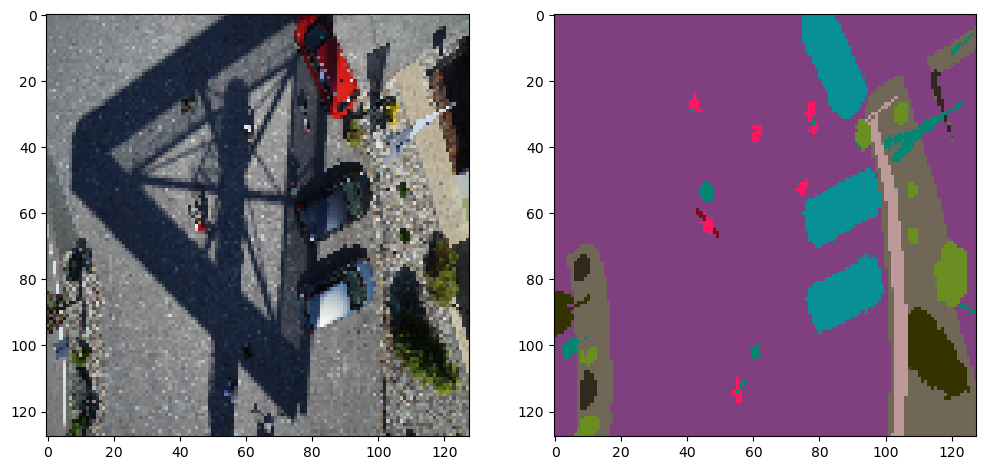

In [15]:
# Sanity check...
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_dataset[image_number])
plt.show()

In [16]:
mask_labels = pd.read_csv('C:/Users/ABHISHEK SHARMA/OneDrive/Desktop/Abhishek_Drone_Set/semantic_drone_dataset/training_set/gt/semantic//class_dict.csv')

In [19]:
mask_labels.shape

(24, 4)

In [20]:
def rgb_to_labels(img, mask_labels):
    label_seg = np.zeros(img.shape,dtype=np.uint8)
    for i in range(mask_labels.shape[0]):
        label_seg[np.all(img == list(mask_labels.iloc[i, [1,2,3]]), axis=-1)] = i
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels...
    return label_seg

In [21]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_labels(mask_dataset[i], mask_labels) # calling rgb to labels for each images...
    labels.append(label)

In [22]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3) # adding channel dim...

Unique labels in label dataset are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


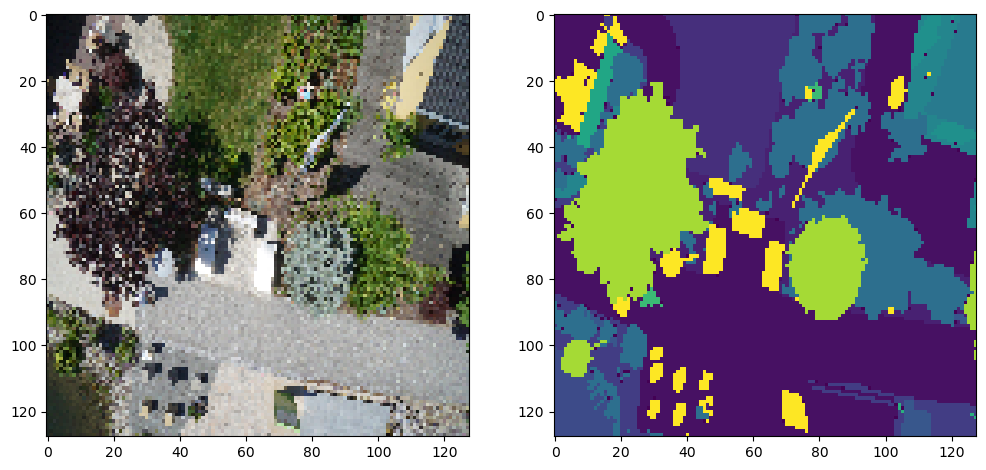

In [33]:
print("Unique labels in label dataset are: ", np.unique(labels))

#Another Sanity check...
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()

In [31]:
#np.save('image_dataset', image_dataset)
#np.save('labels_dataset', labels)